In [41]:
from DataManagement.data_manager import DataManager
from DataManagement.coin_data import CoinData
from constants import ATR_ABNORMALITY_COLUMN
# libs
import pandas as pd
import numpy as np

# plotting
import seaborn as sn

In [2]:
data_manager = DataManager()

In [3]:
coin_symbol_list = ["BTCUSDT", "ETHUSDT", "ADAUSDT"]
feature = "close_pct"
kline_size = "1h"

In [4]:
coin_data_list = [data_manager.get_historical_data_CoinData(coin_symbol, kline_size="1m") for coin_symbol in coin_symbol_list]

# Join close_pct columns of all coins togther

In [5]:
df = pd.DataFrame(index=coin_data_list[0].df.index)

for coin_data in coin_data_list:
    df = df.join(coin_data.df[feature], how="outer", rsuffix=f"_{coin_data.coin_symbol}", on="timestamp")
df.rename(columns={"close_pct":f"close_pct_{coin_data_list[0].coin_symbol}"}, inplace=True)    
df.dropna(inplace=True)
df.drop(columns=["timestamp"])
df.set_index("timestamp", inplace=True)

,close_pct_BTCUSDT,close_pct_ETHUSDT,close_pct_ADAUSDT
timestamp,,,
2018-04-17 04:03:00,0.000410,0.000000,-0.033037
2018-04-17 04:04:00,0.000210,0.000374,0.021373
2018-04-17 04:05:00,-0.000368,0.000000,0.000000
2018-04-17 04:06:00,0.000415,-0.000020,0.012338
2018-04-17 04:07:00,-0.000383,0.000788,-0.011298
...,...,...,...
2021-06-24 09:28:00,0.000537,0.000268,0.000669
2021-06-24 09:28:00,0.000537,0.000052,0.000669
2021-06-24 09:28:00,0.000007,0.000268,0.000669


In [36]:
resampled_list = list(df.resample(rule="1h"))
correlation_matrix_list = []

i = 0

skipping_counter = 0
for timestamp, temp_df in resampled_list:
    if temp_df.empty:
        skipping_counter += 1
        continue
    temp_correl_matrix = temp_df.corr(method="pearson").to_numpy()
    if np.any(np.isnan(temp_correl_matrix)):
        skipping_counter += 1
        continue
    correlation_matrix_list.append(temp_correl_matrix)
    i+=1
correlation_matrix_list = np.array(correlation_matrix_list)
print(f"skipping precent {(skipping_counter/len(resampled_list))*100} %")

skipping precent 0.3006227184882972 %


In [30]:
correlation_matrix_list.mean(axis=0)

array([[1.        , 0.71185939, 0.49268377],
       [0.71185939, 1.        , 0.48861695],
       [0.49268377, 0.48861695, 1.        ]])

In [31]:
c = ['close_pct_BTCUSDT', 'close_pct_ETHUSDT', 'close_pct_ADAUSDT']

In [32]:
mean_corr_df = pd.DataFrame(index= c,columns=c, data=correlation_matrix_list.mean(axis=0))

In [33]:
mean_corr_df

,close_pct_BTCUSDT,close_pct_ETHUSDT,close_pct_ADAUSDT
close_pct_BTCUSDT,1.000000,0.711859,0.492684
close_pct_ETHUSDT,0.711859,1.000000,0.488617
close_pct_ADAUSDT,0.492684,0.488617,1.000000


In [34]:
df.corr()

,close_pct_BTCUSDT,close_pct_ETHUSDT,close_pct_ADAUSDT
close_pct_BTCUSDT,1.000000,0.775890,0.588534
close_pct_ETHUSDT,0.775890,1.000000,0.600464
close_pct_ADAUSDT,0.588534,0.600464,1.000000


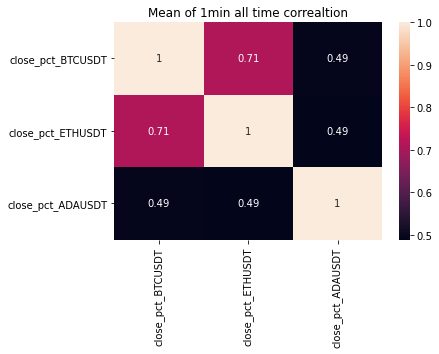

In [35]:
sn.heatmap(mean_corr_df, annot=True).set(title='Mean of 1min all time correaltion');